In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.base import clone

In [ ]:
import pickle
import numpy as np

In [ ]:
path="drive/MyDrive/preprocessed_dataset/"

In [ ]:
with open(path + "train_new", "r") as f:
  train_texts = f.read().splitlines() 

with open(path + "val_new", "r") as f:
  val_texts = f.read().splitlines() 

with open(path + "test_new", "r") as f:
  test_texts = f.read().splitlines() 

In [ ]:
with open(path + 'train_target.pickle', 'rb') as f:
  train_target = pickle.load(f)

with open(path + 'val_target.pickle', 'rb') as f:
  val_target = pickle.load(f)

with open(path + 'test_target.pickle', 'rb') as f:
  test_target = pickle.load(f)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
%%time

X_tfidf_train = tfidf_vectorizer.fit_transform(train_texts)
X_tfidf_val = tfidf_vectorizer.transform(val_texts)
X_tfidf_test = tfidf_vectorizer.transform(test_texts)

CPU times: user 35.3 s, sys: 461 ms, total: 35.7 s
Wall time: 35.8 s


In [ ]:
svd = TruncatedSVD(n_components=350)

In [ ]:
%%time

a = svd.fit_transform(X_tfidf_train)

CPU times: user 1min 16s, sys: 3.52 s, total: 1min 19s
Wall time: 1min 6s


In [ ]:
from functools import partial

score_func = partial(f1_score, average='micro', zero_division=1.0)

In [ ]:
def measure_benchmark_reducers_performance(train_data, train_target, val_data, val_target, test_data, test_target,
                                           space_reducer, classifiers, score_func, verbose=False):
    score_matrix = np.zeros(len(classifiers))
    test_score_matrix = np.zeros(len(classifiers))
    
    train_X = space_reducer.fit_transform(X=train_data)
    test_X = space_reducer.transform(X=test_data)
    val_X = space_reducer.transform(X=val_data)
    
    if verbose:
        print('            ', end='')
    
    for j, clf in enumerate(classifiers):
        if verbose:
            print('test model {}'.format(j + 1), end='|')
        benchmark_model = clone(clf)
        
        benchmark_model.fit(X=train_X, y=train_target)
        score_matrix[j] = score_func(y_true=val_target, y_pred=benchmark_model.predict(X=val_X))
        test_score_matrix[j] = score_func(y_true=test_target, y_pred=benchmark_model.predict(X=test_X))
    
    if verbose:
        print('completed!')
    
    return {'score matrix': score_matrix,
            'test score matrix': test_score_matrix}

In [ ]:
classifiers_list = [SVC(C=1.0, max_iter=5), LogisticRegression()]

In [ ]:
log_params = {'C': [0.1, 1, 5, 10]}

In [ ]:
log_list = [LogisticRegression(C=c) for c in log_params ['C']]

In [ ]:
log_list

[LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 Logisti

In [ ]:
svm_params = {'C': [0.1, 1, 5, 10],
              'max_iter': [5, 10, 15]}

In [ ]:
svm_list = [SVC(C=c, max_iter=i) for c in svm_params['C'] for i in svm_params['max_iter']]

In [ ]:
svm_list

[SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=5, probability=False, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=10, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=15, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=5, probability=False, random_state=None, shrinking=True, tol=0.001,
     

In [ ]:
measure_benchmark_reducers_performance(train_data=X_tfidf_train, train_target=train_target, 
                                       val_data=X_tfidf_val, val_target=val_target, 
                                       test_data=X_tfidf_test, test_target=test_target,
                                       space_reducer=svd, classifiers=log_list, 
                                       score_func=score_func, verbose=True)

            test model 1|

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test model 2|

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test model 3|

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test model 4|

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


completed!


{'score matrix': array([0.55266154, 0.5554    , 0.55493846, 0.55472308]),
 'test score matrix': array([0.5507 , 0.55244, 0.55102, 0.5513 ])}

In [ ]:
pca_dim = [10, 25, 50, 100, 200]

full_score_matrix = np.array([[0.19476, 0.43174], 
                              [0.26068, 0.47726],
                              [0.22856, 0.50348],
                              [0.23134, 0.5226 ],
                              [0.19844, 0.54184]]).T

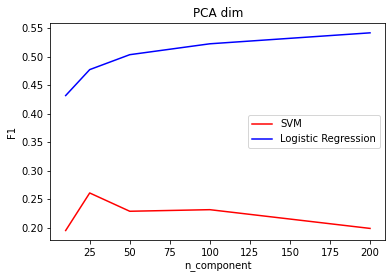

In [ ]:
plt.plot(pca_dim, full_score_matrix[0], 'r', label="SVM")
plt.plot(pca_dim, full_score_matrix[1], 'b', label="Logistic Regression")
plt.title('PCA dim')
plt.legend(loc="center right")
plt.xlabel('n_component')
plt.ylabel('F1')
plt.savefig("PCAdim")

In [ ]:
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
full_score_matrix

array([[0.19476, 0.26068, 0.22856, 0.23134, 0.19844],
       [0.43174, 0.47726, 0.50348, 0.5226 , 0.54184]])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_scores = [0.24286, 0.23908, 0.26312, 0.25198, 0.2517 , 0.24672, 0.21096, 
               0.23616, 0.22624, 0.21932, 0.20348, 0.2065 ]
#max iter 5

test_scores_5 = test_scores[::3]
test_scores_10 = test_scores[1::3]
test_scores_15 = test_scores[2::3]

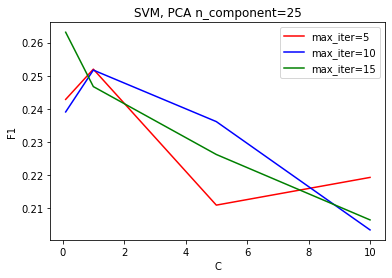

In [ ]:
plt.plot(svm_params["C"], test_scores_5, 'r', label="max_iter=5")
plt.plot(svm_params["C"], test_scores_10, 'b', label="max_iter=10")
plt.plot(svm_params["C"], test_scores_15, 'g', label="max_iter=15")
plt.title('SVM, PCA n_component=25')
plt.legend(loc="upper right")
plt.xlabel('C')
plt.ylabel('F1')
plt.savefig("SVM")

In [ ]:
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
pca_log_dim = [50, 100, 150, 200, 250, 300, 350]

full_log_score_matrix = np.array([[0.49992, 0.501  , 0.50102, 0.50076], 
                                  [0.52328, 0.52416, 0.52408, 0.52392],
                                  [0.5322 , 0.53342, 0.53356, 0.53372],
                                  [0.5384 , 0.54036, 0.54028, 0.53956],
                                  [0.5418 , 0.5452 , 0.5446 , 0.54508],
                                  [0.54886, 0.5508 , 0.55048, 0.5512 ],
                                  [0.5507 , 0.55244, 0.55102, 0.5513 ]]).T

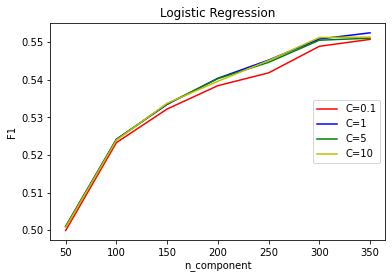

In [ ]:
plt.plot(pca_log_dim, full_log_score_matrix[0], 'r', label="C=0.1")
plt.plot(pca_log_dim, full_log_score_matrix[1], 'b', label="C=1")
plt.plot(pca_log_dim, full_log_score_matrix[2], 'g', label="C=5")
plt.plot(pca_log_dim, full_log_score_matrix[3], 'y', label="C=10")
plt.title('Logistic Regression')
plt.legend(loc="center right")
plt.xlabel('n_component')
plt.ylabel('F1')
plt.savefig("Logistic Regression")

In [ ]:
plt.show()

<Figure size 432x288 with 0 Axes>